# Comparing All Models

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_log_error, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/processed/processed.csv")

In [3]:
data.head()

,Date,AQI,Year,Month,Day,temperature_2m_max,temperature_2m_min,precipitation_sum,weather_code,sunshine_duration,cloud_cover_mean,wind_speed_10m_mean,winddirection_10m_dominant
0,2018-01-01,75.0,2018,1,1,28.253,14.503,0.0,0.0,36062.707,0.000000,5.679092,270.61380
1,2018-01-02,76.0,2018,1,2,28.453,12.903,0.0,1.0,36040.188,7.166666,4.744073,278.32556
2,2018-01-03,79.0,2018,1,3,28.903,15.303,0.0,0.0,36101.605,0.083333,5.611268,285.88390
3,2018-01-04,84.0,2018,1,4,28.353,15.303,0.0,0.0,36083.652,1.541667,5.784296,326.56494
4,2018-01-05,97.0,2018,1,5,28.453,14.003,0.0,3.0,36066.500,46.125000,5.506170,287.77652


In [4]:
# Selecting Features for Training

features = ["Year", "Month", "temperature_2m_max", "temperature_2m_min",
            "precipitation_sum", "weather_code", "sunshine_duration", "cloud_cover_mean",
           "wind_speed_10m_mean", "winddirection_10m_dominant"]

X = data[features]
y = data["AQI"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
en_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

In [7]:
# Training all models

In [8]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [10]:
en_model.fit(X_train, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [25]:
def evaluate_models(model, X_test=X_test, y_test=y_test):
    preds = model.predict(X_test)
    return {
        "R2": r2_score(y_test, preds),
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "RMSLE": root_mean_squared_log_error(y_test, preds)
    }

In [26]:
results = {}

models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Elastic Net": en_model
}

for name, model in models.items():
    results[name] = evaluate_models(model)

results

{'Random Forest': {'R2': 0.64005817993285,
  'MAE': 15.463779296875,
  'RMSE': np.float64(25.475258787748054),
  'RMSLE': 0.20601458483799814},
 'XGBoost': {'R2': 0.591691504171387,
  'MAE': 16.859599351882935,
  'RMSE': np.float64(27.132927759289853),
  'RMSLE': 0.2229397185330592},
 'Elastic Net': {'R2': 0.41018734082034014,
  'MAE': 22.64889099934768,
  'RMSE': np.float64(32.61065298440068),
  'RMSLE': 0.30544844999912885}}

In [27]:
results_df = pd.DataFrame(results)
results_df

,Random Forest,XGBoost,Elastic Net
R2,0.640058,0.591692,0.410187
MAE,15.463779,16.859599,22.648891
RMSE,25.475259,27.132928,32.610653
RMSLE,0.206015,0.222940,0.305448


<Axes: title={'center': 'Model Comparison'}>

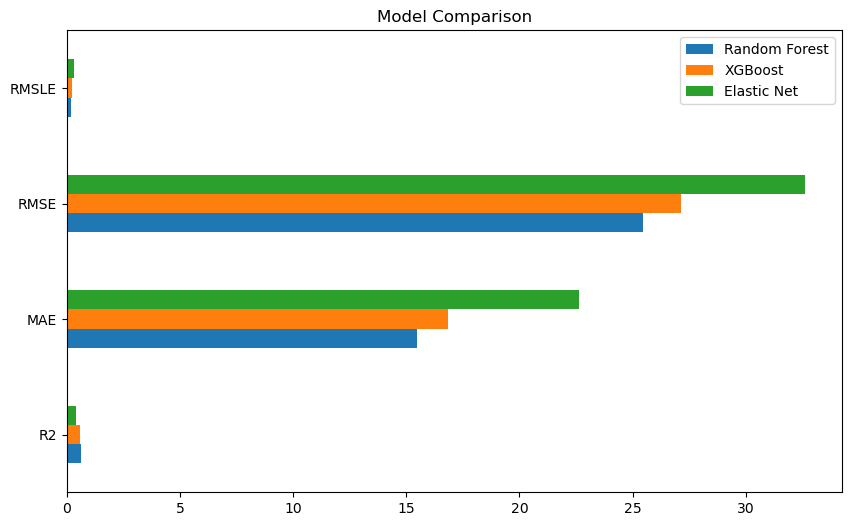

In [28]:
results_df.plot(kind="barh", figsize=(10,6), title="Model Comparison")

# Inference

From this simple bar plot we can see that sklearn's inbuilt RandomForestRegressor model outperforms XGBoost and ElasticNet in all areas